In [1]:
from sklearn.datasets import load_iris
import numpy as np

In [2]:
iris = load_iris()

In [3]:
data = iris.data  #ind
target = iris.target #dep

In [4]:
iris_data = np.insert(data, 4, target, axis = 1)

In [5]:
sf = np.random.permutation(len(iris_data))
iris_data = iris_data[sf]

In [6]:
learning_data = iris_data[:10]

In [7]:
learning_data

array([[6.2, 3.4, 5.4, 2.3, 2. ],
       [6.5, 3.2, 5.1, 2. , 2. ],
       [5.7, 2.9, 4.2, 1.3, 1. ],
       [6.7, 3.1, 4.7, 1.5, 1. ],
       [6.7, 3.3, 5.7, 2.5, 2. ],
       [4.9, 3. , 1.4, 0.2, 0. ],
       [6.8, 3.2, 5.9, 2.3, 2. ],
       [5.6, 2.7, 4.2, 1.3, 1. ],
       [5.1, 3.7, 1.5, 0.4, 0. ],
       [6.6, 3. , 4.4, 1.4, 1. ]])

In [8]:
#a = [32,43,54,45,443]
#b = [5,54,5,44,43]

# for i,j in zip(a,b):
  #  print(i + j)

### Separate By Class

In [9]:
## Step - 1

def Separate_byClass(dataSet):
    Separated_data = {}
    for i in dataSet:
        if i[-1] not in Separated_data:
            Separated_data[i[-1]] = []
        Separated_data[i[-1]].append(i)
    return Separated_data

In [10]:
Sep = Separate_byClass(learning_data)

In [11]:
for i in Sep:
    print("Class:", i, "Prob is:", len(Sep[i])/len(learning_data))

Class: 2.0 Prob is: 0.4
Class: 1.0 Prob is: 0.4
Class: 0.0 Prob is: 0.2


In [12]:
def Mean(numbers):
    return sum(numbers)/len(numbers)

In [13]:
def Std_Value(numbers):
    mean = Mean(numbers)
    std = 0
    Sum = 0
    for i in numbers:
        Sum += (i-mean)**2
    std = (Sum/len(numbers))**0.5

In [14]:
learning_data.mean(axis = 1)

array([3.86, 3.76, 3.02, 3.4 , 4.04, 1.9 , 4.04, 2.96, 2.14, 3.28])

In [15]:
## Step - 2


def Find_Summaries(dataSet):
    mean = np.mean(dataSet, axis = 0)
    std = np.std(dataSet, axis = 0)
    All_Sum = []
    for i in zip(mean, std):
        a = list(i)
        a.append(len(dataSet))
        All_Sum.append(a)
    return All_Sum[:-1]

In [16]:
Find_Summaries(learning_data)

[[6.08, 0.6690291473471093, 10],
 [3.1499999999999995, 0.26551836094703507, 10],
 [4.25, 1.5094701056993478, 10],
 [1.52, 0.7426977851050857, 10]]

In [17]:
## Step - 3

def Manage_DataSet_by_Class(dataSet):
    Manage = {}
    Sep = Separate_byClass(dataSet)
    for i in Sep:
        Manage[i] = Find_Summaries(Sep[i])
    return Manage

In [18]:
test = Manage_DataSet_by_Class(learning_data)
test

{2.0: [[6.55, 0.2291287847477919, 4],
  [3.2749999999999995, 0.08291561975888487, 4],
  [5.525, 0.3031088913245537, 4],
  [2.275, 0.17853571071357124, 4]],
 1.0: [[6.15, 0.5024937810560446, 4],
  [2.925, 0.14790199457749037, 4],
  [4.375, 0.20463381929681126, 4],
  [1.375, 0.08291561975888498, 4]],
 0.0: [[5.0, 0.09999999999999964, 2],
  [3.35, 0.3500000000000001, 2],
  [1.45, 0.050000000000000044, 2],
  [0.30000000000000004, 0.1, 2]]}

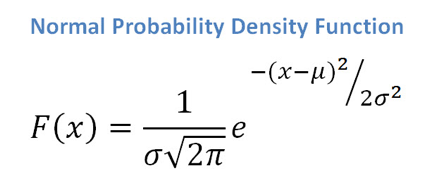

In [19]:
## Step - 4

def Calculate_Prob(x, mean, std):
    part1 = 1/(std * ((2*np.pi)**0.5))
    part2 = np.exp((-(x-mean)**2)/(2*(std**2)))
    return part1 * part2

In [20]:
Calculate_Prob(2.3, 3, 1.2)

0.28043901895412765

In [21]:
## Step - 5

def Find_Probability(DataClass, testData):
    total_row = 0
    for i in DataClass:
        total_row += DataClass[i][0][-1]
    
    prob = {}
    for i in DataClass:
        prob[i] = DataClass[i][0][-1]/total_row
        classSumm = DataClass[i]
        for j in range(len(classSumm)):
            mean, std, Num = classSumm[j]    
            probability = Calculate_Prob(testData[j], mean, std)
            prob[i] = prob[i]*probability
    return prob

In [22]:
Find_Probability(test, learning_data[0])

{2.0: 0.8959412547839087, 1.0: 1.5489054169787488e-34, 0.0: 0.0}

In [23]:
def Prediction(dataclass, newdata):
    prob = Find_Probability(dataclass, newdata)
    Max = [0, 0] # [class, prob]
    for c in prob:
        if prob[c] > Max[1]:
            Max[1] = prob[c]
            Max[0] = c
            
    return Max

In [24]:
def Classifier(train, test):
    summ = Manage_DataSet_by_Class(train)
    pred = Prediction(summ, test)
    

# with Sklearn

In [32]:
from sklearn.naive_bayes import GaussianNB

In [40]:
model = GaussianNB()

In [41]:
model = model.fit(data, target)

In [42]:
pred = model.predict(data)

In [43]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [44]:
accuracy_score(pred, target)

0.96